@@ Project Context:

    @ Our clinet is an online Retailer based in the UK. 
    @ They want to create a groups of these international customerts based on their previous purchase patterns.
    @ Their goal is to provide more tailored services and improve the way they market these international customers.
 
@@ Current Solution:

    -> Country wise grouping.
    
@@ Our Goal:

    
    Problem Specific :
    
        Deliverable : Clusters for customers 
        
        ML Task : Clusatering model
        
        Target variable: N/A(Unsupervised learning)
        
        Winning condition: N/A(Subjective results)

In [1]:
# numPy for Numarical Python  importing

import numpy as np


# Pandas for DataFrames importing

import pandas as pd


# to visulaize 100 columns to better understanding about features/columns in my data

pd.set_option('display.max_columns',100)


# Matplotlib for visualizations

import matplotlib

from matplotlib import pyplot as plt

# Display the plots in the same jupyter notebook
%matplotlib inline


# Seaborn for some Easy visualizations 
import seaborn as sns

In [2]:
# Loading the international online Transactions data from CSV

df = pd.read_csv(r"C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\Customer Segmentation\Data/int_online_tx.csv")

In [4]:
# All Primary information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35116 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      35116 non-null int64
StockCode      35116 non-null object
Description    35116 non-null object
Quantity       35116 non-null int64
InvoiceDate    35116 non-null object
UnitPrice      35116 non-null float64
CustomerID     33698 non-null float64
Country        35116 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.1+ MB


@ Observations:

    -> 4 numarical features
    
    -> 4 categorical features
    
    -> Custemer ID Feature has Null values. ******

In [5]:
# sample observation

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
# check list for data types of features

# 'InvoiceNo' - > int64

df.InvoiceNo.nunique() - 1591

# StockCode  -> object

df.StockCode.nunique() -2602

# Description  -> Object

df.StockCode.nunique() - 2602

# Quntity - int64

df.Quantity.nunique()  - 85

# Invoice date- > Object

df.InvoiceDate.nunique()  -1577

df.InvoiceDate.min()    # -1/10/11 10:35

df.InvoiceDate.max()    # -9/9/11 9:13


# Unit Price -> Float
df.UnitPrice.nunique() - 176
 
# Customer Id  -> Float

df.CustomerID.nunique()  # - 414(including missing/null) 

# Country name - > Object

df.Country.nunique() -37

df.Country.value_counts()

Germany                 9040
France                  8407
Spain                   2484
Belgium                 2031
Switzerland             1966
Portugal                1501
Norway                  1071
EIRE                     815
Italy                    758
Channel Islands          748
Finland                  685
Cyprus                   614
Australia                468
Sweden                   451
Unspecified              446
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   295
Hong Kong                284
Netherlands              283
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       57
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic

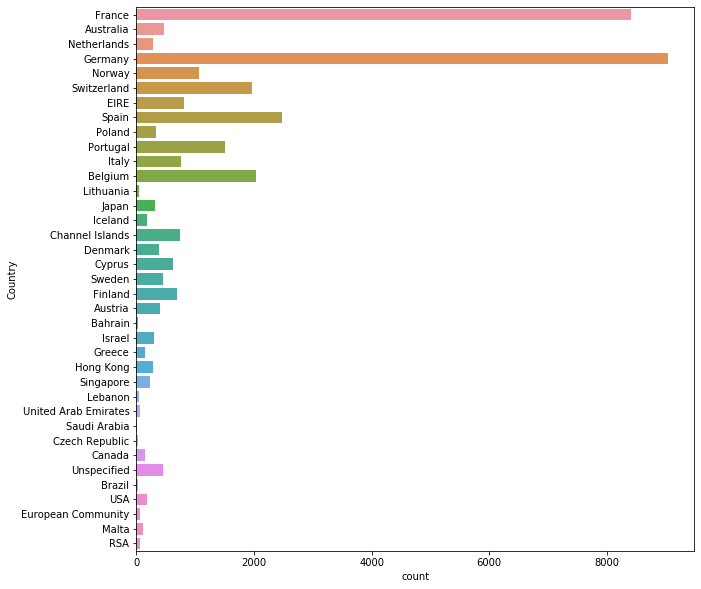

In [27]:

# make figure size
plt.figure(figsize=(10,10))

# bar plot by country
sns.countplot(y = 'Country',data = df)
plt.show()

In [29]:
# Missing data by feature

df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [30]:
# Only keep the transactions with customerID's

df = df[df.CustomerID.notnull()]

In [31]:
# data size after removing the null customer ID's
df.shape

(33698, 8)

In [33]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [34]:
# Change customer ID from flaot to int

df['CustomerID']= df.CustomerID.astype(int)

G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int32
Country         object
dtype: object

In [37]:
df.CustomerID.head(50)

0     12583
1     12583
2     12583
3     12583
4     12583
5     12583
6     12583
7     12583
8     12583
9     12583
10    12583
11    12583
12    12583
13    12583
14    12583
15    12583
16    12583
17    12583
18    12583
19    12583
20    12431
21    12431
22    12431
23    12431
24    12431
25    12431
26    12431
27    12431
28    12431
29    12431
30    12431
31    12431
32    12431
33    12431
34    12791
35    12791
36    12662
37    12662
38    12662
39    12662
40    12662
41    12662
42    12662
43    12662
44    12662
45    12662
46    12662
47    12662
48    12662
49    12662
Name: CustomerID, dtype: int32

In [38]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [41]:
# Creating intraction feature

df['Sales'] = df.Quantity * df.UnitPrice

df.Sales.head(10)

G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
5    40.8
6    30.0
7    53.1
8    70.8
9    46.8
Name: Sales, dtype: float64

In [42]:
df.shape

(33698, 9)

In [44]:
# saving the data frame into cleaned transactions

df.to_csv(r"C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\Customer Segmentation\Data/cleaned_transactions.csv", index = None)

In [45]:
df = pd.read_csv(r"C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\Customer Segmentation\Data/cleaned_transactions.csv")

In [ ]:
# Customer ID -> Total_products/ Unique_products/total salses/ total_transactions

In [46]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [47]:
# Aggrigate invoice data

invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions':'nunique'})

G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
invoice_data.head(10)

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1
12356,3


In [52]:
# product data

product_data = df.groupby('CustomerID').StockCode.agg({'total_Products':'count','total_unique_products':'nunique'})

G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
product_data.head(10)

,total_Products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59
12353,4,4
12354,58,58
12355,13,13
12356,59,53


In [55]:
# sales invoice data

sales_data = df.groupby('CustomerID').Sales.agg({'avg_product_value':'mean','total_Sales':'sum'})

G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
sales_data.head()

,avg_product_value,total_Sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


@ Business :


    Customer                 Products                          time 
    
    -> different types of products offered to customers.
    
    -> Multiple customers to one product
    
    -> Correct time for product.
    
    -> Correct time for customer.
    
    -> Time for both customer and product combination.
    
    
    


In [57]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [58]:
# Aggregate cart_level data 

cart_data = df.groupby(['CustomerID','InvoiceNo']).Sales.agg({'cart_value':'sum'})

cart_data.head(10)

G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
           573511        1294.32
           581180         224.82
12348      539318         892.80
           541998         227.44
           548955         367.00

In [61]:
# reset index

cart_data.reset_index(inplace =True)

In [62]:
cart_data

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
5,12347,573511,1294.32
6,12347,581180,224.82
7,12348,539318,892.80
8,12348,541998,227.44
9,12348,548955,367.00


In [65]:
# aggrigate cart data (At customer -level)

agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({'avg_cart_value':'mean','min_cart_value':'min','max_cart_value':'max'})


G:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [70]:
agg_cart_data

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30
12353,89.000000,89.00,89.00
12354,1079.400000,1079.40,1079.40
12355,459.400000,459.40,459.40
12356,937.143333,58.35,2271.62


In [72]:
customer_df = invoice_data.join(['product_data'])

AttributeError: 'builtin_function_or_method' object has no attribute 'is_unique'

In [78]:
# join

customer_df = invoice_data.join(['product_data','sales_data','agg_cart_data'],on = 'CustomerID')

ValueError: Joining multiple DataFrames only supported for joining on index

In [75]:
product_data.head()

,total_Products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [76]:
sales_data.head()

,avg_product_value,total_Sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


In [77]:
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [79]:
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [85]:
 a= pd.merge(invoice_data,product_data,on = 'CustomerID')

In [87]:
b = pd.merge(a,sales_data,on = 'CustomerID')

In [90]:
customer_df = pd.merge(b, agg_cart_data, on = 'CustomerID')

In [91]:
customer_df.head()

,total_transactions,total_Products,total_unique_products,avg_product_value,total_Sales,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,615.714286,224.82,1294.32
12348,4,31,22,57.975484,1797.24,449.310000,227.44,892.80
12349,1,73,73,24.076027,1757.55,1757.550000,1757.55,1757.55
12350,1,17,17,19.670588,334.40,334.400000,334.40,334.40
12352,8,85,59,29.482824,2506.04,313.255000,120.33,840.30


In [92]:
customer_df.columns

Index(['total_transactions', 'total_Products', 'total_unique_products',
       'avg_product_value', 'total_Sales', 'avg_cart_value', 'min_cart_value',
       'max_cart_value'],
      dtype='object')

In [93]:
customer_df.to_csv(r'C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\Customer Segmentation\Data/analytical_transactions.csv')

In [94]:
# loading the cleaned transactions data

cleaned_df = pd.read_csv(r"C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\Customer Segmentation\Data/cleaned_transactions.csv")

In [95]:
cleaned_df.shape

(33698, 9)

In [96]:
cleaned_df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Sales          float64
dtype: object

In [99]:
cleaned_df.nunique()

InvoiceNo      1536
StockCode      2574
Description    2639
Quantity         80
InvoiceDate    1523
UnitPrice       168
CustomerID      414
Country          36
Sales           873
dtype: int64

In [100]:
cleaned_df.shape

(33698, 9)

In [107]:
# create a data frame with nunique and data types
type(cleaned_df.nunique())
(cleaned_df.dtypes)

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Sales          float64
dtype: object

In [108]:
#  observation

InvoiceNo      1536   -> int64
StockCode      2574   -> object
Description    2639   -> object
Quantity         80   -> int64
InvoiceDate    1523   -> object
UnitPrice       168   -> float64
CustomerID      414   -> int64
Country          36   -> object
Sales           873   -> float64

SyntaxError: invalid syntax (<ipython-input-108-d74a85e79ef7>, line 2)

In [123]:
[cleaned_df.dtypes=='object']

[InvoiceNo      False
 StockCode       True
 Description     True
 Quantity       False
 InvoiceDate     True
 UnitPrice      False
 CustomerID     False
 Country         True
 Sales          False
 dtype: bool]

In [124]:
for a in cleaned_df.columns:
    if type(a) =='object':
        print(yes)

In [128]:
sum = 0
for feature in cleaned_df.dtypes[cleaned_df.dtypes=='object'].index:
    cleaned_df.feature.nunique()
    
    
 

AttributeError: 'DataFrame' object has no attribute 'feature'

In [143]:
cleaned_df.dtypes[cleaned_df.dtypes=='object'].nunique()

1

In [142]:
df_check.nunique()

1

In [136]:
type(df_check)

pandas.core.series.Series

In [137]:
cleaned_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [144]:
for a in cleaned_df.columns:
    print(a)
    

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
Sales


In [147]:
# to identify the unique classess in categorical features
cleaned_df.select_dtypes(include= 'object').nunique().sum()

6772

In [148]:
cleaned_df.shape

(33698, 9)

In [150]:
cleaned_df.size

303282

@@ Dimensionality : It refers to the number of features in the dataset.

    -> The number of features increases we need more and more observations to build any sort of meaning full model, especially for clustering .

In [187]:
cleaned_df['StockCode'].head()

0    22728
1    22727
2    22726
3    21724
4    21883
Name: StockCode, dtype: object

In [186]:
# First 10 stockcode, descriptions print

cleaned_df[['StockCode', 'Description']].head(10)

,StockCode,Description
0,22728,ALARM CLOCK BAKELIKE PINK
1,22727,ALARM CLOCK BAKELIKE RED
2,22726,ALARM CLOCK BAKELIKE GREEN
3,21724,PANDA AND BUNNIES STICKER SHEET
4,21883,STARS GIFT TAPE
5,10002,INFLATABLE POLITICAL GLOBE
6,21791,VINTAGE HEADS AND TAILS CARD GAME
7,21035,SET/2 RED RETROSPOT TEA TOWELS
8,22326,ROUND SNACK BOXES SET OF4 WOODLAND
9,22629,SPACEBOY LUNCH BOX


In [189]:
# unique items in StockCode

cleaned_df.StockCode.nunique()

# or 

len(cleaned_df.StockCode.unique())

2574

In [190]:
# creating sample data frame {CustomerID : 14566, 17844}

df_s = cleaned_df[cleaned_df.CustomerID==14566 14566]

SyntaxError: invalid syntax (<ipython-input-190-c6c1a1d12799>, line 3)

In [191]:
# creating sample data frame {CustomerID : 14566, 17844}

toy_df = cleaned_df[cleaned_df.CustomerID.isin([14566,17844])]


In [192]:
toy_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
19250,563900,85099C,JUMBO BAG BAROQUE BLACK WHITE,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19251,563900,85099B,JUMBO BAG RED RETROSPOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19252,563900,23199,JUMBO BAG APPLES,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19253,563900,22386,JUMBO BAG PINK POLKADOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19851,564428,21993,FLORAL FOLK STATIONERY SET,12,8/25/11 11:27,1.25,17844,Canada,15.00
19852,564428,23295,SET OF 12 MINI LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64
19853,564428,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,8/25/11 11:27,0.83,17844,Canada,13.28
19854,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,8/25/11 11:27,1.25,17844,Canada,10.00
19855,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64


In [193]:
# Get toy dummies

toy_item_dummies = pd.get_dummies(toy_df.StockCode)

In [194]:
# Adding the customer ID to the toy_item_dummies

toy_item_dummies['CustomerID'] = df_s['CustomerID']

In [195]:
toy_item_dummies

,21993,22386,23199,23293,23294,23295,23296,85099B,85099C,CustomerID
19250,0,0,0,0,0,0,0,0,1,14566
19251,0,0,0,0,0,0,0,1,0,14566
19252,0,0,1,0,0,0,0,0,0,14566
19253,0,1,0,0,0,0,0,0,0,14566
19851,1,0,0,0,0,0,0,0,0,17844
19852,0,0,0,0,0,1,0,0,0,17844
19853,0,0,0,1,0,0,0,0,0,17844
19854,0,0,0,0,0,0,1,0,0,17844
19855,0,0,0,0,1,0,0,0,0,17844


In [197]:

# Create a toy_item_data by aggregating at customer level 

toy_item_data = toy_item_dummies.groupby('CustomerID').sum()

# display the toy item data

toy_item_data

,21993,22386,23199,23293,23294,23295,23296,85099B,85099C
CustomerID,,,,,,,,,
14566,0,1,1,0,0,0,0,1,1
17844,1,0,0,1,1,1,1,0,0


In [199]:
# this is a data frame with stock code as dummy's

# item_dummies

item_dummies = pd.get_dummies(cleaned_df.StockCode)

# adding Custeomer id to the item _dummies
item_dummies['CustomerID'] = cleaned_df.CustomerID

In [200]:
type(item_dummies)

pandas.core.frame.DataFrame

In [201]:
item_dummies.shape

(33698, 2575)

In [203]:
# create item_data by aggregating at customer level

item_data= item_dummies.groupby('CustomerID').sum()

# displaying the first 5 rows

item_data.head(5)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [215]:
item_data.shape

(414, 2574)

In [204]:
# Total times each item was purchased

item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [205]:
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [206]:
item_data.to_csv(r"C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\Customer Segmentation\Data/item_data.csv")

# Threshold

In [207]:
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [208]:
# Sorting the values and identifying the top 20
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

In [209]:
# Get list of Stock codes for the top 20 most popular items

top_20_items = item_data.sum().sort_values().tail(20).index

top_20_items

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')

In [210]:
# Keep only the features for top 20 items based on stock code

top_20_items_data = item_data[top_20_items]

In [211]:
# Shape of remaining data shape

top_20_items_data.shape

(414, 20)

In [212]:
top_20_items_data.head()

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [213]:
top_20_items_data.columns

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')

In [214]:
# Save threshold_item_data_csv

top_20_items_data.to_csv(r"C:\Users\Mohan\7.00 Am Morning\Machine learning\ml_algos_implementations\data folder/threshold_item_data.csv")

# Principal component analysis  -PCA

In [ ]:
a , b , c , d   ->  2a + 3b+ 4c + d

In [ ]:
1, 2, 3, 10, 15, 19, 24, 34   =>    1,2,3, 3X3 +1 (z), 3*5, 3 X 5 +2X2 (Z1),   Z1+2X2 +1, Z1 +Z

In [2]:
dd=pd.DataFrame({'a':[1,2,3,4,5],'b':[8,9,10,11,12]})

In [3]:
dd


,a,b
0,1,8
1,2,9
2,3,10
3,4,11
4,5,12


In [4]:
cor=dd.corr()

In [7]:
cor

,a,b
a,1.0,1.0
b,1.0,1.0
